# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [ ]:
#implement elbow method from scratch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(X):
  weight = [] 
  K=[]
  i=2
  
  while i<15:
      kmeans = KMeans(n_clusters = i, random_state = 1)
      kmeans.fit(X) 
      weight.append(kmeans.inertia_)
      K.append(i)
     
      i=i+3
  
  plt.plot(K, weight, 'bx-')
  plt.xlabel('k value')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method')
  plt.show()
  



In [ ]:
#implement silhouette method from scratch
from sklearn.cluster import KMeans



from sklearn.metrics import silhouette_score
def silhouette(x):
    kval=[]
    score=[]
    i=2
    
    while i<12:
        model = KMeans(n_clusters=i,random_state=42)
        model.fit(x)
        labels = model.labels_
        si_score=silhouette_score(x,labels)
        score.append(si_score)
        kval.append(i)
        
        i=i+1
    plt.plot(kval,score)
    plt.xlabel('clusters no.')
    plt.ylabel('Silhouette Score')
    plt.show()
   


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

trainX = trainX.astype(np.float32) 
testX = testX.astype(np.float32)

trainX = trainX.reshape(len(trainX),-1)
testX = testX.reshape(len(testX),-1)

from sklearn.model_selection import train_test_split
traino,trains,testo,tests = train_test_split(trainX, trainy, test_size=0.2, random_state=1)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

print(traino.shape, trains.shape)
print(testo.shape, tests.shape)

# you can performs your training on train/test dataset alone if there are computational issues

(60000, 784) (60000,)
(10000, 784) (10000,)
(48000, 784) (12000, 784)
(48000,) (12000,)


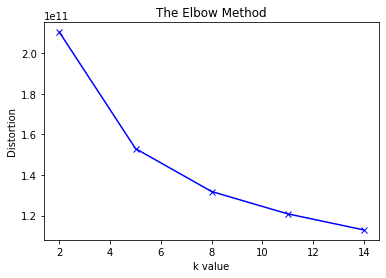

In [ ]:
elbow(trainX)


OPTIMAL POINT 5 IN ELBOW METHOD

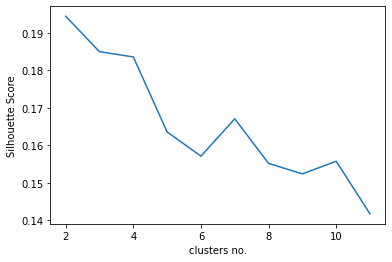

In [ ]:
silhouette(trains)


OPTIMAL POINT IN silhouette IS 6

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
index=[]
weight1=[]
weight2=[]
for i in range(2,12,2):
  model1 = KMeans(n_clusters=i, init='k-means++',random_state=1)
  model1.fit(trainX)
  weight1.append(model1.inertia_)
  model2 = KMeans(n_clusters=i, init='random',random_state=1)
  model2.fit(trainX)
  weight2.append(model2.inertia_)
  index.append(i)



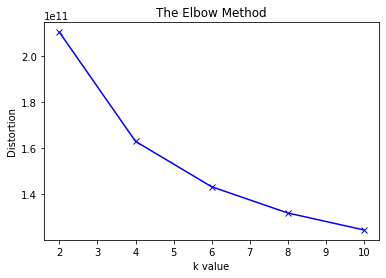

In [ ]:
plt.plot(index, weight1, 'bx-')
plt.xlabel('k value')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

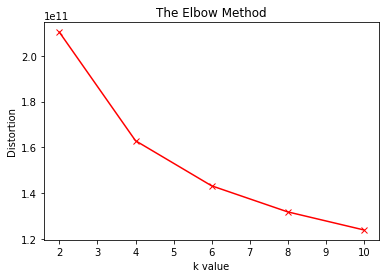

In [ ]:
plt.plot(index, weight2, 'rx-')
plt.xlabel('k value')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


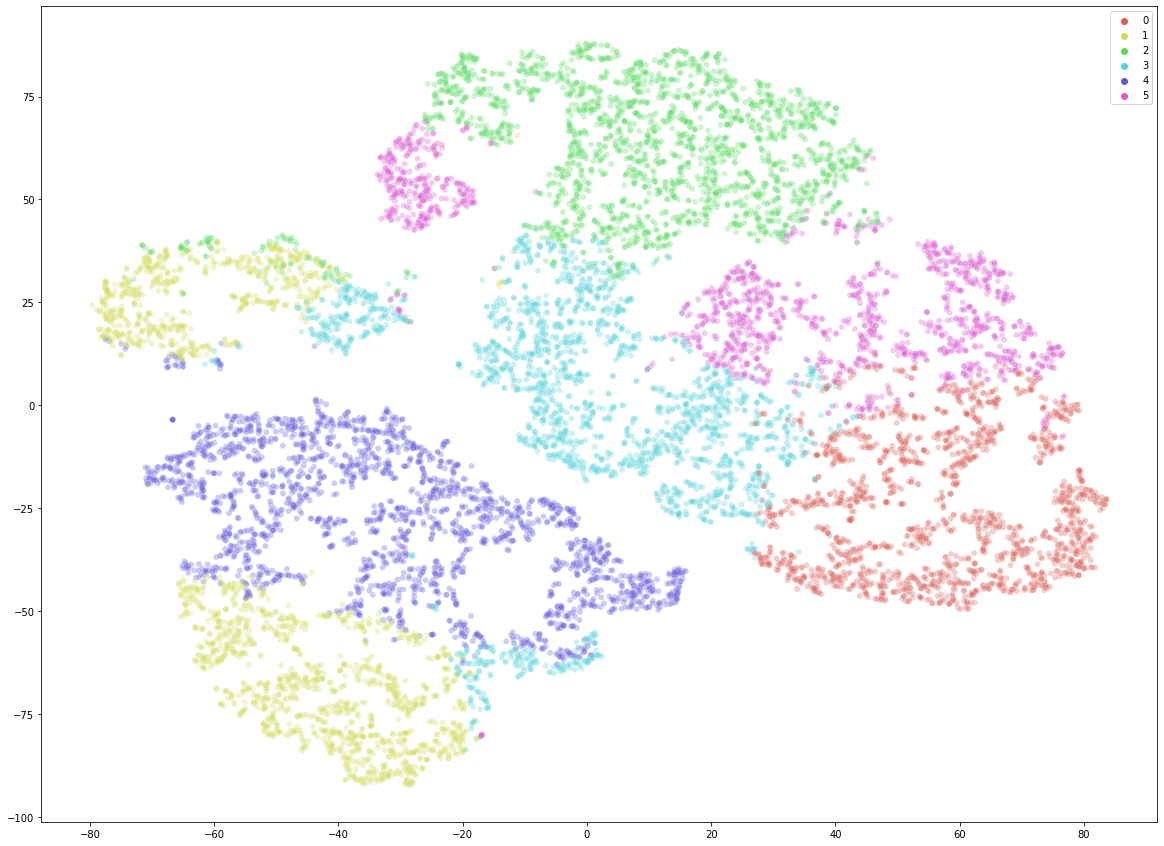

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import seaborn as sns
modelx = KMeans(n_clusters=6, init='k-means++',random_state=1)
modelx.fit(trains)
y=modelx.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
trains=pca.fit_transform(trains)
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
X_tsne = tsne.fit_transform(trains)
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1], hue=y,
    palette=sns.color_palette('hls', len(np.unique(y))),
    legend='full', alpha=0.3
)
plt.show()


## Part2: Hierarchical clustering

In [ ]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering(trains):
  hirmodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
  hirmodel = hirmodel.fit(trains)
  return hirmodel





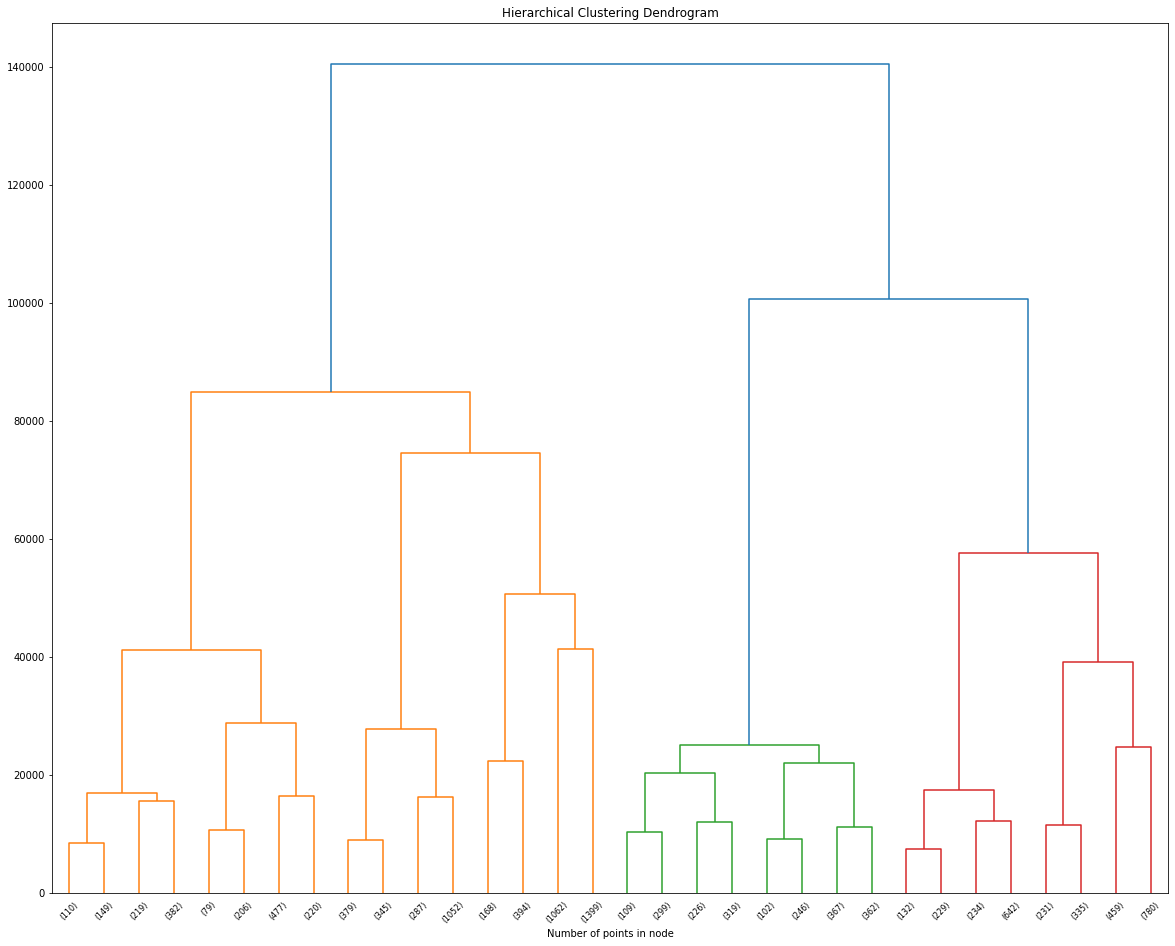

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def dendogram(model, **args):
    
    
    dp = np.zeros(model.children_.shape[0])
    lenc=len(dp)
    i=0
    nums = len(model.labels_)
    while i<lenc:
      for j in model.children_[i]:
        if(j<nums):
          dp[i]=dp[i]+1
        else:
          dp[i]=dp[i]+dp[j-nums]
      i=i+1

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, dp]
    ).astype(float)

    dendrogram(linkage_matrix, **args)




hirmodel = hierarchical_clustering(trains)

plt.figure(figsize=(20,16))
dendogram(hirmodel, truncate_mode="level", p=4)
plt.xlabel("Number of points in node")
plt.title("Hierarchical Clustering Dendrogram")

plt.show()
  
  

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: 
at first you have to take all point as clusster.
you have to calculate all pairwise euclidian  distance at every step
merge those clusster with smallest shortest distance.
as result a dendogram will created

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


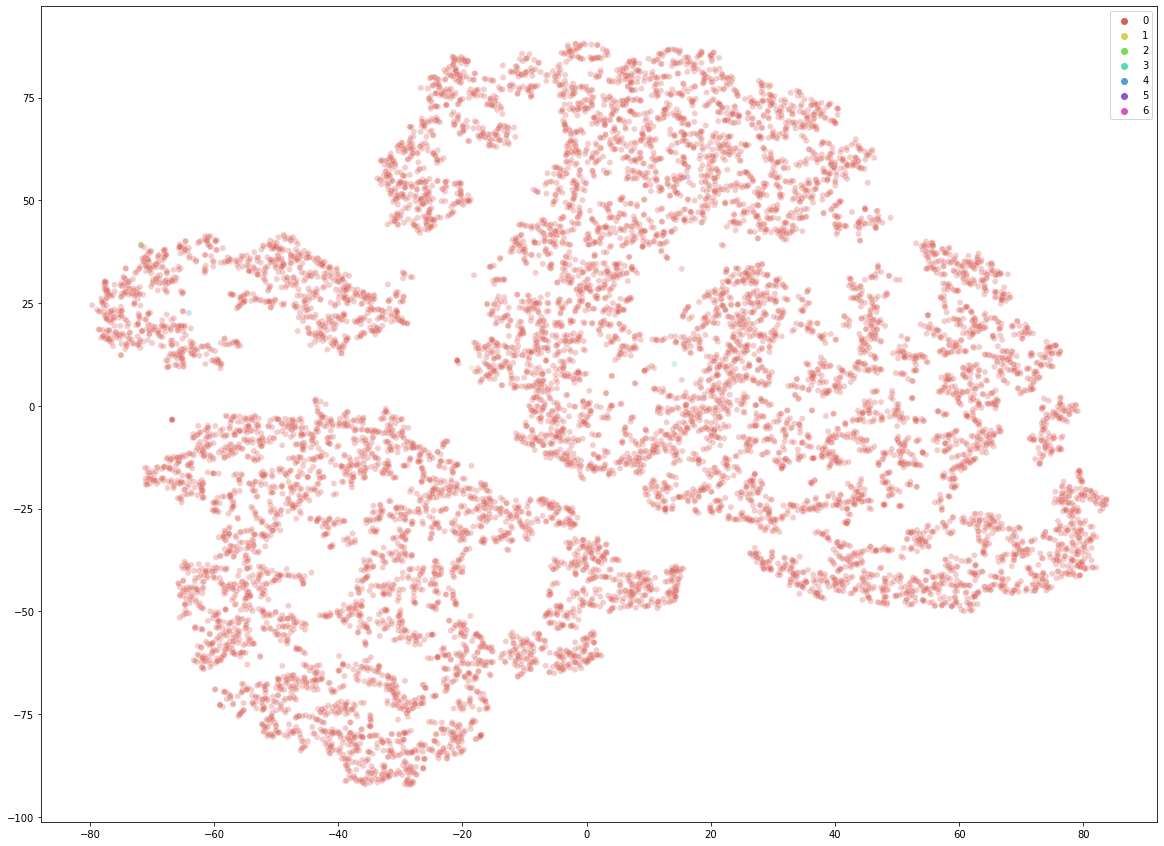

In [ ]:


hirmodel1 = AgglomerativeClustering(linkage='single', n_clusters=7)
hirmodel1 = hirmodel1.fit(trains)
y=hirmodel1.labels_
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
trains=pca.fit_transform(trains)

tsne = TSNE(n_components=2, perplexity=30, random_state=1)
X_tsne = tsne.fit_transform(trains)
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1], hue=y,
    palette=sns.color_palette('hls', len(np.unique(y))),
    legend='full', alpha=0.3
)
plt.show()




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


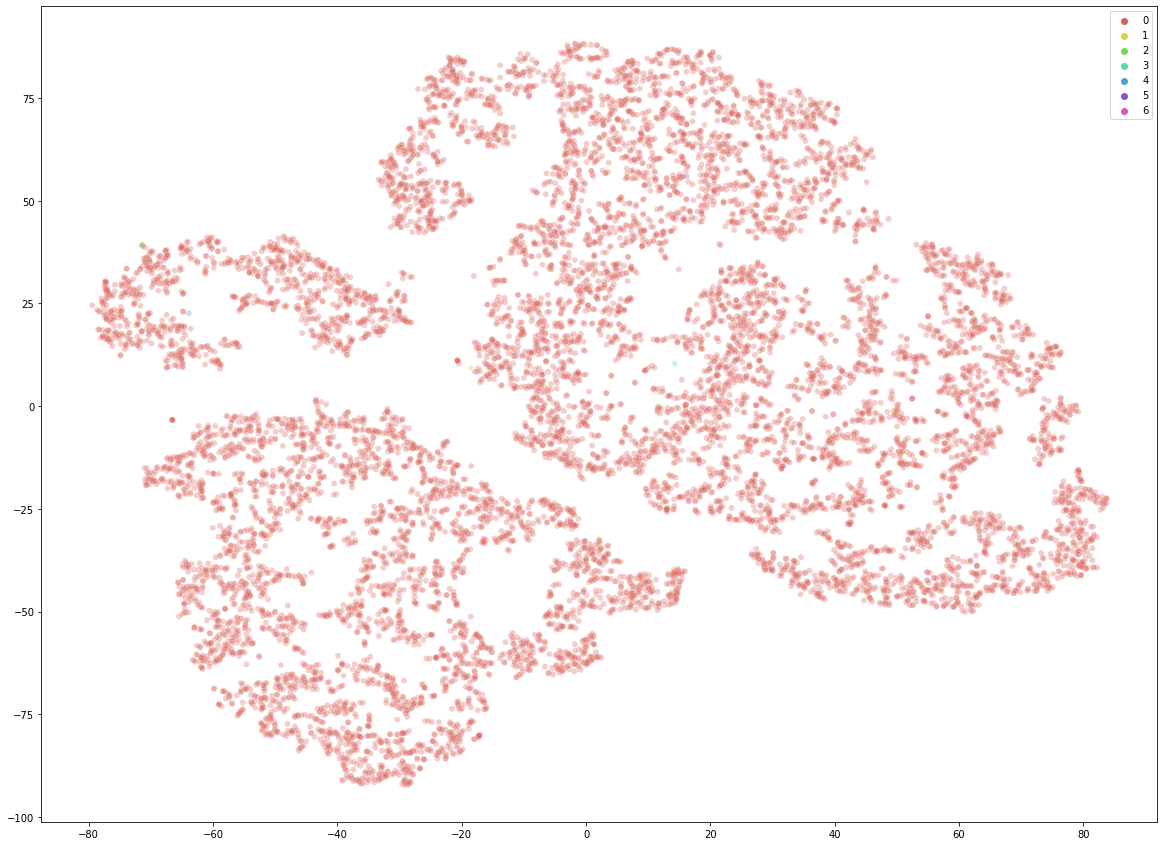

In [ ]:

# from sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# trains=pca.fit_transform(trains)

# tsne2 = TSNE(n_components=2, perplexity=30, random_state=1)
# X_tsne2 = tsne2.fit_transform(trains)
# plt.figure(figsize=(20, 15))
# sns.scatterplot(
#     x=X_tsne2[:,0], y=X_tsne2[:,1], hue=y,
#     palette=sns.color_palette('hls', len(np.unique(y))),
#     legend='full', alpha=0.3
# )
# plt.show()





from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import seaborn as sns
hirmodel2 = AgglomerativeClustering(linkage='complete', n_clusters=7)
hirmodel2 = hirmodel1.fit(trains)
y=hirmodel2.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
trains=pca.fit_transform(trains)
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
X_tsne = tsne.fit_transform(trains)
plt.figure(figsize=(20, 15))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1], hue=y,
    palette=sns.color_palette('hls', len(np.unique(y))),
    legend='full', alpha=0.3
)
plt.show()



**Question:** Mention the differences observed using single and complete linkage:

Answer:


## Part3: Image Compression

In [ ]:
# Boiler plate code
import numpy as np
import cv2
from sklearn.cluster import KMeans


img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgSize = img.shape

imgcon=imgSize[0] * imgSize[1]
X = img.reshape(imgcon, imgSize[2])


for k in range(3,19,3):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

  pixels = kmeans.cluster_centers_[kmeans.labels_]
  compressedimg= pixels.reshape(img.shape)
  cv2.imwrite(f'compressed_image{k}.jpg', compressedimg)

  original_size = imgcon * img.shape[2] * 8
  compressedSize = k * 24 + np.ceil(np.log2(k))*imgcon
  data_reduction = 1 - compressedSize / original_size

  
  print(f"Data reduction for k={k}: {data_reduction:.2%}")

Data reduction for k=3: 91.67%
Data reduction for k=6: 87.50%
Data reduction for k=9: 83.33%
Data reduction for k=12: 83.33%
Data reduction for k=15: 83.33%
Data reduction for k=18: 79.16%
